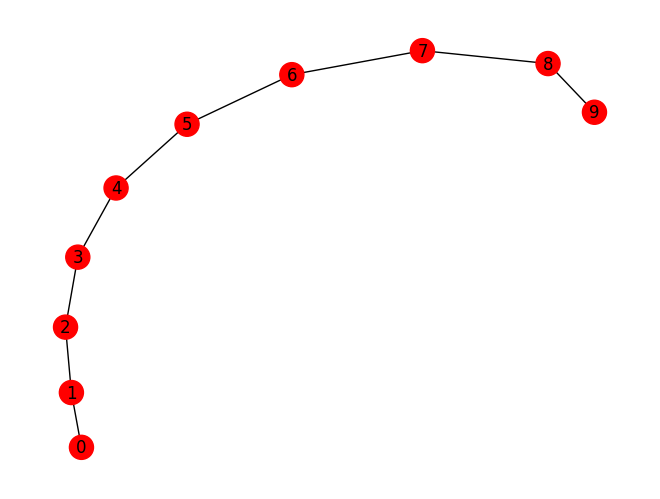

In [73]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Exercise a

# Initial configuration
N = 10
edges = []
for i in range(N-1):
    edges.append((i, i+1))

G = nx.Graph()
G.add_edges_from(edges)
W = nx.to_numpy_array(G)

C = ['red', 'green']

X = np.full(N, 'red', dtype=str)
nx.draw(G, node_color=X, with_labels=True)

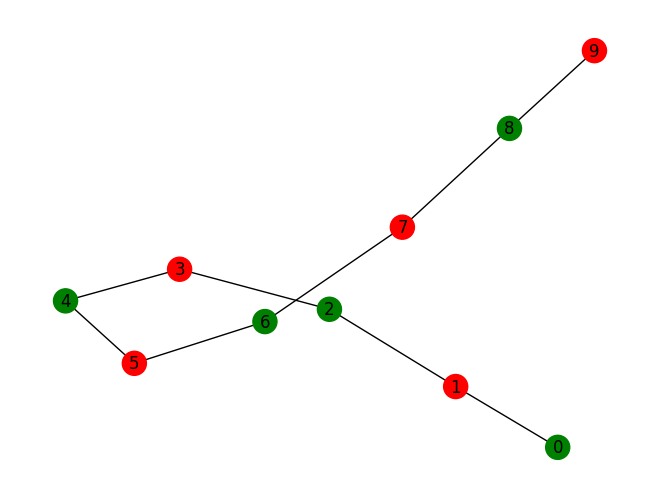

In [66]:
# Initially, c = 1 for each pair of nodes since they all have the same color
U = np.sum(W) * 0.5
U_hist = [U]
t = 0
while(U > 0):
    node = np.random.choice(range(N))
    eta = t/50
    prob = []
    W_i = W[:,node]

    # Compute the probability of choosing each color
    for s in C:
        exponent = 0
        for j in range(N):
            exponent += W_i[j]*int(s == X[j])
        
        P_s = np.exp(-eta*exponent)
        prob.append(P_s)

    prob /= np.sum(prob)
    
    X[node] = np.random.choice(C, p=prob)
    U = 0
    for i in range(N):
        for j in range(N):
            U += W[i][j] * int(X[j] == X[i])
    U /= 2
    U_hist.append(U)
    t += 1

nx.draw(G, node_color=X, with_labels=True)

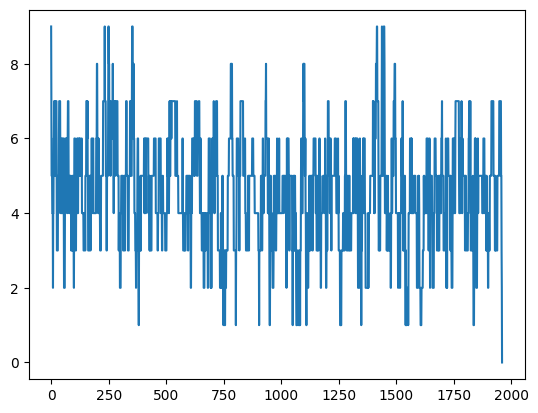

In [68]:
plt.plot(range(t+1), U_hist)

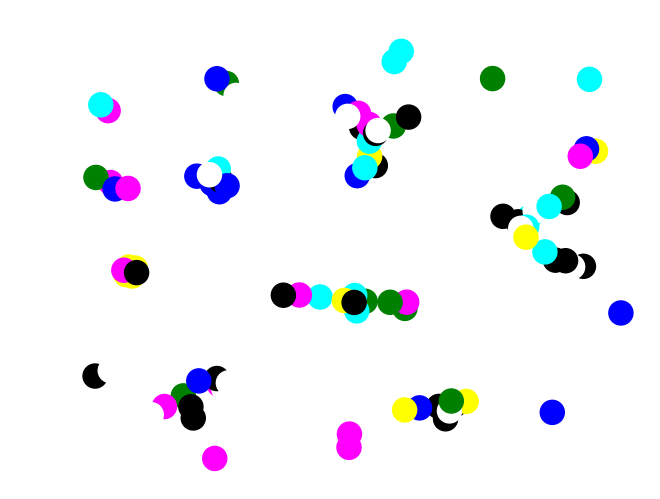

In [ ]:
# Exercise b:

W = sp.io.loadmat('wifi.mat')["wifi"]
G = nx.from_numpy_array(W)
X = np.random.randint(1, 8, np.size(W, 1))
C = range(1, 8)
colors = np.array(['red', 'green', 'blue', 'yellow', 'magenta', 'cyan', 'white', 'black'])

col = C[X]
nx.draw(G, node_color=col)

In [114]:

t = 0
U = 0
for i in range(N):
    for j in range(N):
        U_ij = W[i][j]
        if X[i] == X[j]:
            U_ij *= 2
        elif np.abs(X[i]-X[j]) > 1:
            U_ij = 0
        U += U_ij
U_hist = [U]

while(U > 0):
    node = np.random.choice(range(N))
    eta = t/50
    prob = []
    W_i = W[:,node]

    # Compute the probability of choosing each color
    for s in range(1,9):
        exponent = 0
        for j in range(N):
            exp_sj = W_i[j]
            if X[j] == s:
                exp_sj *= 2
            elif np.abs(s-X[j]) > 1:
                exp_sj = 0
            exponent += exp_sj

        
        P_s = np.exp(-eta*exponent)
        prob.append(P_s)

    prob /= np.sum(prob)
    
    X[node] = np.random.choice(C, p=prob)
    U = 0
    for i in range(N):
        for j in range(N):
            U_ij = W[i][j]
            if X[i] == X[j]:
                U_ij *= 2
            elif np.abs(X[i]-X[j]) > 1:
                U_ij = 0
            U += U_ij
    U /= 2
    U_hist.append(U)
    t += 1

ValueError: invalid literal for int() with base 10: np.str_('magenta')